<a href="https://colab.research.google.com/github/Sheetal-ai/Hotel_booking_cancellation_tensorflow/blob/master/Hotel_Booking_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/Sheetal-ai/Hotel_booking_cancellation_tensorflow/master/hotel_bookings.csv'
df = pd.read_csv(url)


In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(87396, 32)

In [6]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [8]:
df_cancelled = df[df.is_canceled == 1]
df_cancelled.shape

(24025, 32)

In [9]:
print("% of cancelled hotes", df_cancelled.shape[0] * 100/df.shape[0])
print("% of non cancellation",100 -(df_cancelled.shape[0] * 100/df.shape[0]) )

% of cancelled hotes 27.489816467572886
% of non cancellation 72.5101835324271


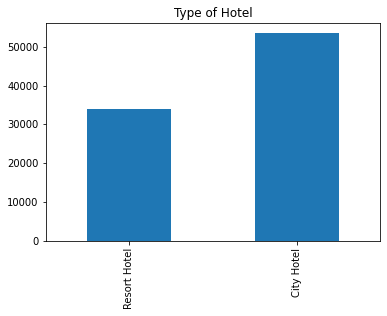

In [10]:
df['hotel'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Type of Hotel')
plt.show()

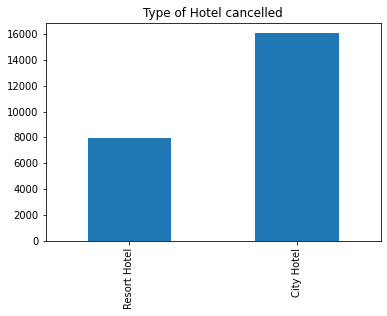

In [11]:
df_cancelled['hotel'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Type of Hotel cancelled')
plt.show()

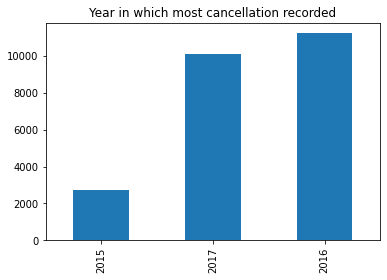

In [12]:
df_cancelled['arrival_date_year'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Year in which most cancellation recorded')
plt.show()

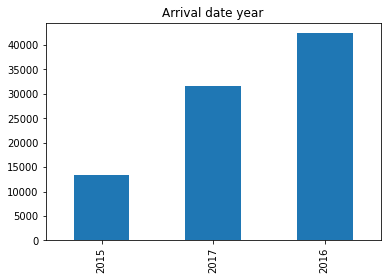

In [13]:
df['arrival_date_year'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Arrival date year')
plt.show()

In [14]:
print('Number of cancellation obesrved in years:')
df_cancelled_2015 = df_cancelled[df_cancelled.arrival_date_year == 2015]
df_cancelled_2016 = df_cancelled[df_cancelled.arrival_date_year == 2016]
df_cancelled_2017 = df_cancelled[df_cancelled.arrival_date_year == 2017]
print(df_cancelled_2015.shape)
print(df_cancelled_2016.shape)
print(df_cancelled_2017.shape)

Number of cancellation obesrved in years:
(2704, 32)
(11208, 32)
(10113, 32)


In [15]:
print('Number of arrivals observed in years:')
df_2015 = df[df.arrival_date_year == 2015]
df_2016 = df[df.arrival_date_year == 2016]
df_2017 = df[df.arrival_date_year == 2017]
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)

Number of arrivals observed in years:
(13313, 32)
(42391, 32)
(31692, 32)


In [16]:
print("maximum cancellation obesrved in year")
print("cancellation obesrved for year 2015",df_cancelled_2015.shape[0] * 100/df_2015.shape[0])
print("cancellation obesrved for year 2016",df_cancelled_2016.shape[0] * 100/df_2016.shape[0])
print("cancellation obesrved for year 2017",df_cancelled_2017.shape[0] * 100/df_2017.shape[0])

maximum cancellation obesrved in year
cancellation obesrved for year 2015 20.310974235709455
cancellation obesrved for year 2016 26.439574437970325
cancellation obesrved for year 2017 31.91026126467247


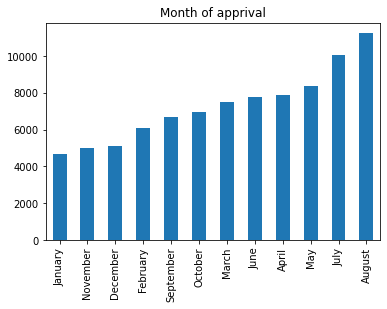

In [17]:
df['arrival_date_month'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Month of apprival')
plt.show()

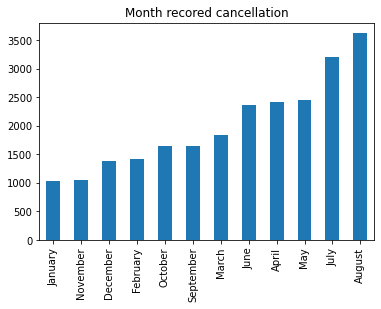

In [18]:
df_cancelled['arrival_date_month'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Month recored cancellation')
plt.show()

In [19]:
df['adults'].value_counts().sort_values()

55        1
50        1
40        1
10        1
6         1
27        2
20        2
5         2
26        5
4        60
0       385
3      5935
1     16503
2     64497
Name: adults, dtype: int64

In [20]:
df_cancelled['adults'].value_counts().sort_values()

10        1
40        1
55        1
6         1
50        1
27        2
5         2
20        2
26        5
4        14
0        97
3      2028
1      3209
2     18661
Name: adults, dtype: int64

In [21]:
df=df.loc[(df['adults']<10)]
df.shape

(87383, 32)

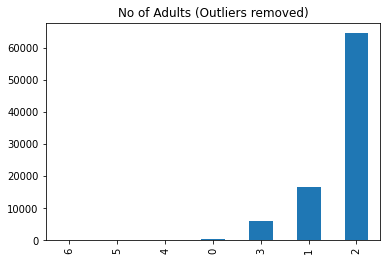

In [22]:
df['adults'].value_counts().sort_values().plot(kind='bar')
plt.title('No of Adults (Outliers removed)')
plt.show()

In [23]:
df['children'].value_counts()

0.0     79015
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

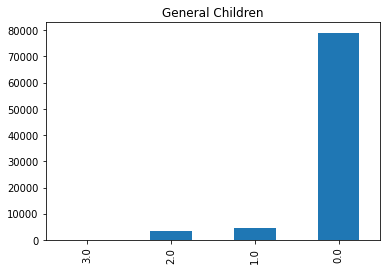

In [24]:
df=df.loc[(df['children']<10)]
df=df.loc[(df['children']<10)]
df['children'].value_counts().sort_values().plot(kind='bar')
plt.title('General Children')
plt.show()

In [25]:
df['country'].value_counts()

PRT    27435
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
KHM        1
BHS        1
AIA        1
NAM        1
MRT        1
Name: country, Length: 177, dtype: int64

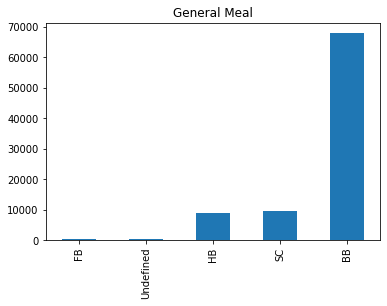

In [26]:
# How much of it with meal 
df['meal'].value_counts().sort_values().plot(kind='bar')
plt.title('General Meal')
plt.show()

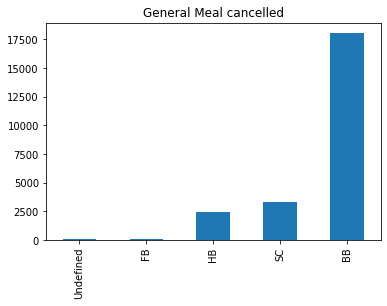

In [27]:
# How much of it with meal 
df_cancelled['meal'].value_counts().sort_values().plot(kind='bar')
plt.title('General Meal cancelled')
plt.show()

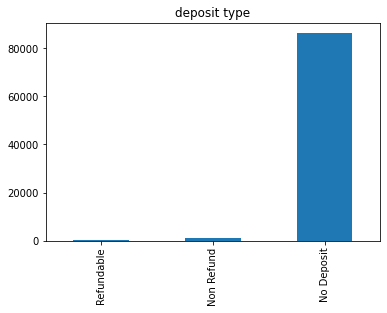

In [28]:
df['deposit_type'].value_counts().sort_values().plot(kind='bar')
plt.title('deposit type')
plt.show()

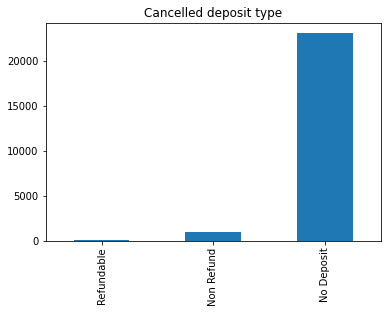

In [29]:
df_cancelled['deposit_type'].value_counts().sort_values().plot(kind='bar')
plt.title('Cancelled deposit type')
plt.show()

In [30]:
df['company'].value_counts()
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12183
company                           82119


In [31]:
df.drop(columns=['company'],inplace=True)
df.shape

(87378, 31)

In [32]:
for column in df.columns:
  if (df[column].dtype == 'object'):
     df[column] = df[column].astype('category')
     df[column] = df[column].cat.codes

print(df.shape)

(87378, 31)


In [33]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,NaN,0,2,0.0,0,0,1,120
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,NaN,0,2,0.0,0,0,1,120
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,NaN,0,2,75.0,0,0,1,121
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,121
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,122
6,1,0,0,2015,5,27,1,0,2,2,0.0,0,0,135,3,1,0,0,0,2,2,0,0,NaN,0,2,107.0,0,0,1,122
7,1,0,9,2015,5,27,1,0,2,2,0.0,0,1,135,3,1,0,0,0,2,2,0,0,303.0,0,2,103.0,0,1,1,122
8,1,1,85,2015,5,27,1,0,3,2,0.0,0,0,135,6,3,0,0,0,0,0,0,0,240.0,0,2,82.0,0,1,0,71
9,1,1,75,2015,5,27,1,0,3,2,0.0,0,2,135,5,3,0,0,0,3,3,0,0,15.0,0,2,105.5,0,0,0,60
10,1,1,23,2015,5,27,1,0,4,2,0.0,0,0,135,6,3,0,0,0,4,4,0,0,240.0,0,2,123.0,0,0,0,113


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87378 non-null  int8   
 1   is_canceled                     87378 non-null  int64  
 2   lead_time                       87378 non-null  int64  
 3   arrival_date_year               87378 non-null  int64  
 4   arrival_date_month              87378 non-null  int8   
 5   arrival_date_week_number        87378 non-null  int64  
 6   arrival_date_day_of_month       87378 non-null  int64  
 7   stays_in_weekend_nights         87378 non-null  int64  
 8   stays_in_week_nights            87378 non-null  int64  
 9   adults                          87378 non-null  int64  
 10  children                        87378 non-null  float64
 11  babies                          87378 non-null  int64  
 12  meal                           

In [35]:
df.fillna(value = 0,inplace= True,axis =0)
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,120
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,120
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,121
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,121
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,122
6,1,0,0,2015,5,27,1,0,2,2,0.0,0,0,135,3,1,0,0,0,2,2,0,0,0.0,0,2,107.0,0,0,1,122
7,1,0,9,2015,5,27,1,0,2,2,0.0,0,1,135,3,1,0,0,0,2,2,0,0,303.0,0,2,103.0,0,1,1,122
8,1,1,85,2015,5,27,1,0,3,2,0.0,0,0,135,6,3,0,0,0,0,0,0,0,240.0,0,2,82.0,0,1,0,71
9,1,1,75,2015,5,27,1,0,3,2,0.0,0,2,135,5,3,0,0,0,3,3,0,0,15.0,0,2,105.5,0,0,0,60
10,1,1,23,2015,5,27,1,0,4,2,0.0,0,0,135,6,3,0,0,0,4,4,0,0,240.0,0,2,123.0,0,0,0,113


In [69]:
Y = df['is_canceled'].values
X = df.drop(columns ='is_canceled').values
X


array([[1.000e+00, 3.420e+02, 2.015e+03, ..., 0.000e+00, 1.000e+00,
        1.200e+02],
       [1.000e+00, 7.370e+02, 2.015e+03, ..., 0.000e+00, 1.000e+00,
        1.200e+02],
       [1.000e+00, 7.000e+00, 2.015e+03, ..., 0.000e+00, 1.000e+00,
        1.210e+02],
       ...,
       [0.000e+00, 3.400e+01, 2.017e+03, ..., 4.000e+00, 1.000e+00,
        9.190e+02],
       [0.000e+00, 1.090e+02, 2.017e+03, ..., 0.000e+00, 1.000e+00,
        9.190e+02],
       [0.000e+00, 2.050e+02, 2.017e+03, ..., 2.000e+00, 1.000e+00,
        9.190e+02]])

In [49]:
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [108]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state =101)


In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [113]:
epochs = 50
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(64,activation='sigmoid'),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(2,activation='sigmoid')
                             ])
model.compile(optimizer='adam',loss= tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])


In [114]:
history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.2)

Epoch 1/50
1639/1639 [==============================] - 3s 2ms/step - loss: 0.1432 - accuracy: 0.9417 - val_loss: 2.0654e-04 - val_accuracy: 1.0000
Epoch 2/50
1639/1639 [==============================] - 3s 2ms/step - loss: 1.2508e-04 - accuracy: 1.0000 - val_loss: 3.2918e-05 - val_accuracy: 1.0000
Epoch 3/50
1639/1639 [==============================] - 3s 2ms/step - loss: 2.4345e-05 - accuracy: 1.0000 - val_loss: 9.5030e-06 - val_accuracy: 1.0000
Epoch 4/50
1639/1639 [==============================] - 3s 2ms/step - loss: 7.4348e-06 - accuracy: 1.0000 - val_loss: 3.2521e-06 - val_accuracy: 1.0000
Epoch 5/50
1639/1639 [==============================] - 3s 2ms/step - loss: 2.5047e-06 - accuracy: 1.0000 - val_loss: 1.2006e-06 - val_accuracy: 1.0000
Epoch 6/50
1639/1639 [==============================] - 3s 2ms/step - loss: 9.5033e-07 - accuracy: 1.0000 - val_loss: 4.6558e-07 - val_accuracy: 1.0000
Epoch 7/50
1639/1639 [==============================] - 3s 2ms/step - loss: 3.6274e-07 - acc

In [115]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 66        
Total params: 14,370
Trainable params: 14,370
Non-trainable params: 0
_________________________________________________________________


In [116]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [118]:
history

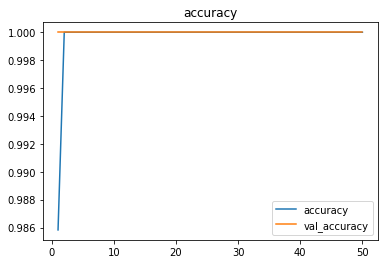

In [119]:
history = history.history
epochs_num = np.arange(1,epochs+1)
plt.figure(0)
plt.title('accuracy')
plt.plot(epochs_num,history['accuracy'],label='accuracy')
plt.plot(epochs_num,history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()



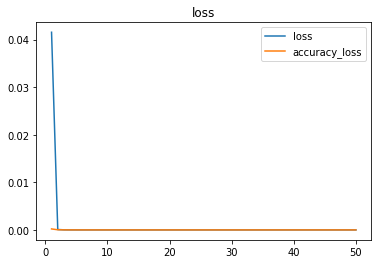

In [120]:
plt.figure(0)
plt.title('loss')
plt.plot(epochs_num,history['loss'],label='loss')
plt.plot(epochs_num,history['val_loss'],label='accuracy_loss')
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [122]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[15840     0]
 [    0  6005]]


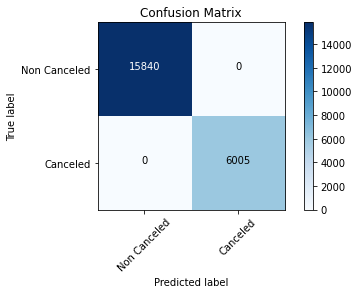

In [123]:
comp=model.predict(x_test)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_test, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Canceled','Canceled'],title='Confusion Matrix')
plt.show()

In [125]:
# plt.figure(figsize=(12,6))
# cm = confusion_matrix(y_true=y_test, y_pred=comp)
# plot_confusion_matrix(cm=cm,classes=['Non Canceled','Canceled'],title='Confusion Matrix',normalize=True)
# plt.show()
print('F1 score '+str(f1_score(y_true=y_test,y_pred=comp)))

F1 score 1.0
